In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

### 1. Biểu đồ 1: phân phối điểm trung bình của nhóm thí sinh có điểm 0 theo môn thi

In [5]:
df_0 = pd.read_csv('vnhsge-2018_zero.csv')
df_0['avg_score'] = df_0['avg_score'].fillna(0)
#df_0

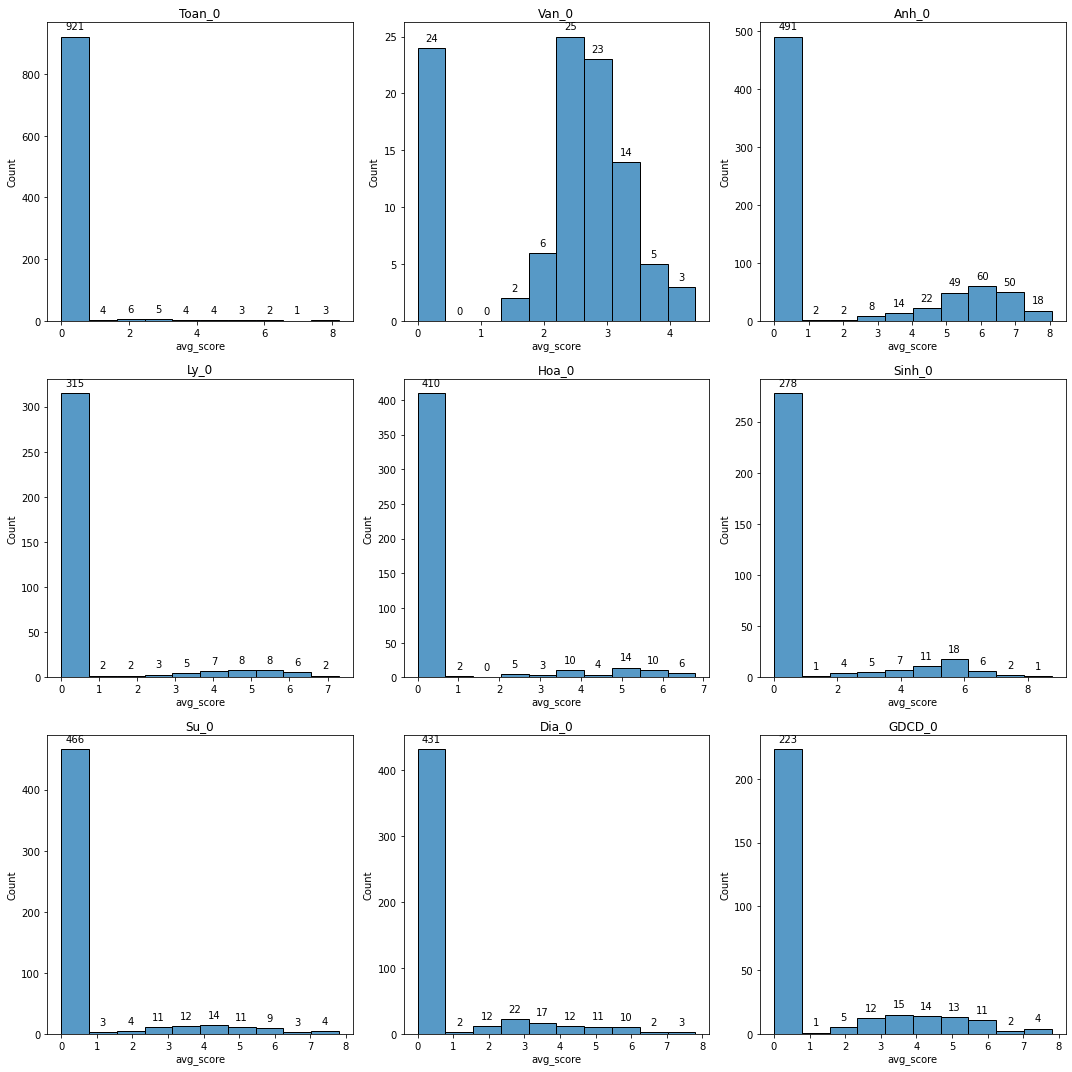

In [6]:
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# List of subject IDs
subjects = ["Toan_0", "Van_0", "Anh_0", "Ly_0", "Hoa_0", "Sinh_0", "Su_0", "Dia_0", "GDCD_0"]

# Iterate over each subject ID and plot the corresponding histogram
for i, subject in enumerate(subjects):
    ax = sns.histplot(data=df_0[df_0[subject] == 1], x="avg_score", ax=axes[i], bins=10)
    axes[i].set_title(subject)
    # Đặt nhãn số cho từng cột của biểu đồ
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       xytext = (0, 10), 
                       textcoords = 'offset points')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.savefig("c10.png",dpi=400) 
# Show plot
plt.show()

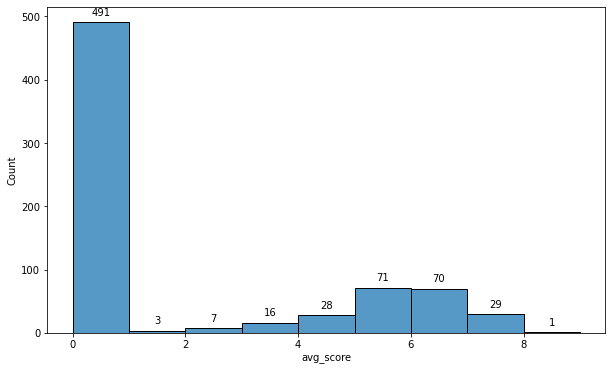

In [7]:
plt.figure(figsize=(10, 6))
ax = sns.histplot(data=df_0[df_0.Anh_0 == 1], x="avg_score", binwidth=1)
# Đặt nhãn số cho từng cột của biểu đồ
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 10), 
                   textcoords = 'offset points')

plt.savefig("c11.png",dpi=400) 
# Show plot
plt.show()

### Biểu đồ 2. Mối quan hệ giữa điểm trung bình và chênh lệch điểm của nhóm thí sinh THPT

In [9]:
df_grad = pd.read_csv('vnhsge-2018_avg.csv')
df_grad

,candidate_id,avg_score,subject_group,count_5,avg_score_1,count_score_1,avg_score_0,count_score_0,score_range
0,1000019,5.60,KHXH,4,5.58,3,5.62,3,2.45
1,1000020,7.35,KHXH,6,7.35,3,6.58,3,2.50
2,1000021,6.67,KHXH,5,6.67,3,6.08,3,4.25
3,1000022,7.30,KHXH,5,7.30,3,6.92,3,4.65
4,1000023,6.45,KHXH,4,6.45,3,5.75,3,3.80
...,...,...,...,...,...,...,...,...,...
805491,64006212,6.22,KHXH,5,6.25,3,6.05,3,4.75
805492,64006213,6.85,KHTN,4,6.85,3,4.42,3,5.00
805493,64006214,6.08,KHTN,5,6.11,4,6.02,2,4.45
805494,64006215,5.50,KHTN,4,6.60,3,4.40,3,4.80


In [10]:
def round_to_nearest_half(x):
    return np.round(x * 2) / 2

In [11]:
df_tmp = df_grad.copy()
df_tmp['score_range'] = df_tmp['score_range'].apply(round_to_nearest_half)
df_tmp['avg_score'] = df_tmp['avg_score'].apply(round_to_nearest_half)

<Figure size 576x432 with 0 Axes>

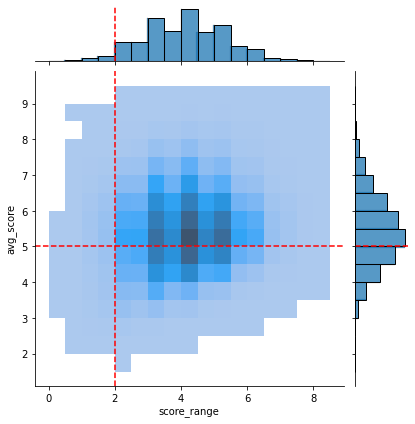

In [12]:
# Create JointGrid
plt.figure(figsize=(8, 6))
g =  sns.jointplot(data=df_tmp, x="score_range", y="avg_score", kind="hist",binwidth=0.5)
g.plot_marginals(sns.histplot,binwidth=0.5)
# Scatter plo
# Additional formatting
g.refline(x=2, y=5,color='red')
plt.savefig("c13.png",dpi=400) 
plt.show()

### Biểu đồ 3,4. Phân phối điểm thi theo 2 nhóm môn

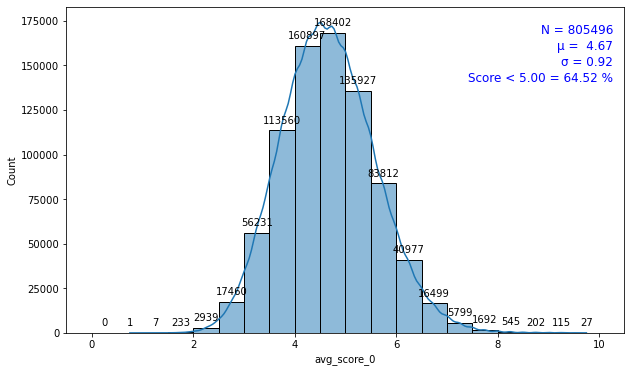

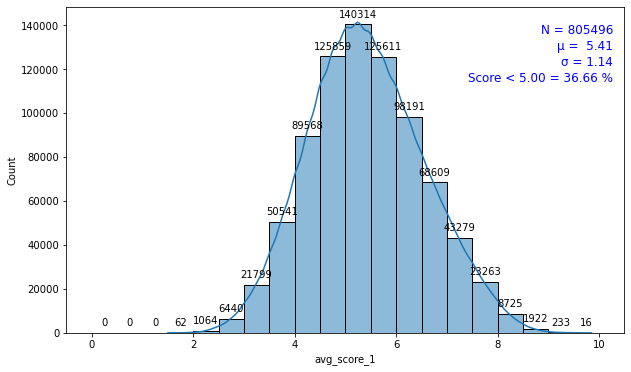

In [11]:
for i in ['avg_score_0','avg_score_1']:
    num_rows = len(df_grad)
    mean = np.mean(df_grad[i])
    std_dev = np.std(df_grad[i])
    num_rows_5 = len(df_grad[df_grad[i] < 5]) / len(df_grad) * 100
    bins = [i for i in range(0, 21, 1)]
    bins = [i / 2 for i in bins]
    bins 
    plt.figure(figsize=(10, 6))
    ax = sns.histplot(data=df_grad, x=i, bins=bins,kde=True)
    ax.text(0.98, 0.95, f'N = {num_rows}', transform=ax.transAxes, fontsize=12, color='blue', verticalalignment='top',horizontalalignment='right')
    ax.text(0.98, 0.9, f'μ =  {mean:.2f}', transform=ax.transAxes, fontsize=12, color='blue', verticalalignment='top',horizontalalignment='right')
    ax.text(0.98, 0.85, f'σ = {std_dev:.2f}', transform=ax.transAxes, fontsize=12, color='blue', verticalalignment='top',horizontalalignment='right')
    ax.text(0.98, 0.8, f'Score < 5.00 = {num_rows_5:.2f} %', transform=ax.transAxes, fontsize=12, color='blue', verticalalignment='top',horizontalalignment='right')

    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), 
                           (p.get_x() + p.get_width() / 2., p.get_height()), 
                           ha = 'center', va = 'center', 
                           xytext = (0, 10), 
                           textcoords = 'offset points')
    plt.savefig("result-{}.png".format(i),dpi=400) 
    plt.show()

### Biểu đồ 5. Phân phối số lượng môn thi có điểm trên trung bình

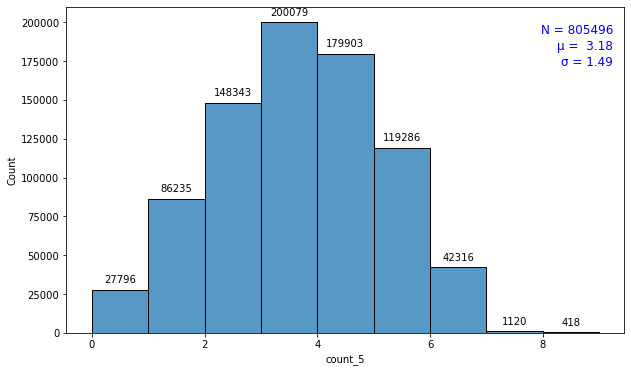

In [10]:
num_rows = len(df_grad)
mean = np.mean(df_grad['count_5'])
std_dev = np.std(df_grad['count_5'])

plt.figure(figsize=(10, 6))
ax = sns.histplot(data=df_grad, x="count_5", binwidth=1)
ax.text(0.98, 0.95, f'N = {num_rows}', transform=ax.transAxes, fontsize=12, color='blue', verticalalignment='top',horizontalalignment='right')
ax.text(0.98, 0.9, f'μ =  {mean:.2f}', transform=ax.transAxes, fontsize=12, color='blue', verticalalignment='top',horizontalalignment='right')
ax.text(0.98, 0.85, f'σ = {std_dev:.2f}', transform=ax.transAxes, fontsize=12, color='blue', verticalalignment='top',horizontalalignment='right')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.00f'), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       xytext = (0, 10), 
                       textcoords = 'offset points')
plt.savefig("c15.png",dpi=400) 
plt.show()

### Biểu đồ 6. Tổng và phần trăm tích lũy theo điểm trung bình

In [14]:
data = []
i = 0
while i <= 10:
    x = len(df_grad[df_grad['avg_score'] >= i])
    y = len(df_grad)
    percent = round(x/y,3)*100
    data.append((i, x, percent))
    #print(i,":",x,"/",y,"(",percent,")")
    i += 0.25
new_df = pd.DataFrame(data, columns=['score', 'count', 'percent'])
#new_df

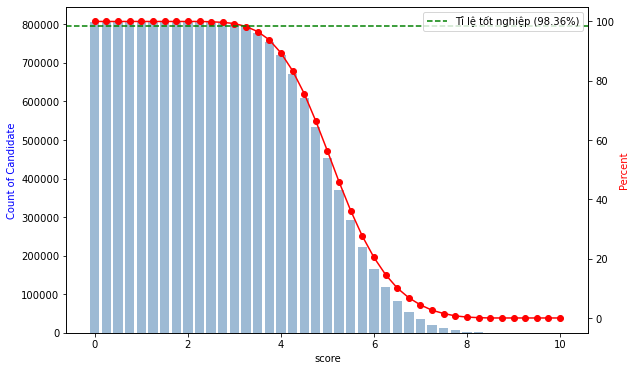

In [15]:
fig, ax1 = plt.subplots(figsize=(10, 6))
# Create bar plot on primary axis
ax1.bar(new_df['score'], new_df['count'], width = 0.2,color='#0b5394', alpha=0.4)
ax1.set_xlabel('score')
ax1.set_ylabel('Count of Candidate', color='blue')

# Create a secondary axis for the line plot
ax2 = ax1.twinx()
ax2.plot(new_df['score'], new_df['percent'], color='red', marker='o')
ax2.set_ylabel('Percent', color='red')

# Add grid for both axes
ax1.grid(False)
ax2.grid(False)
fig.subplots_adjust(right=0.85)

ax2.axhline(y=98.36, color='green', linestyle='--', label='Tỉ lệ tốt nghiệp (98.36%)')
ax2.legend(loc='upper right')
# Add title
plt.savefig("c14.png",dpi=300) 
plt.show()

### Biểu đồ 7. Biểu đồ boxplot so sánh điểm khối thi lớn nhất và điểm môn thi thấp nhất

In [16]:
df_full_score = pd.read_csv('vnhsge-2018_minmax.csv')
df_full_score['max_score'] = df_full_score['max_block_score'].apply(round_to_nearest_half)
df_full_score = df_full_score[df_full_score['max_score'] >= 15]
df_full_score

,candidate_id,min_subject_score,max_block_score,max_score
0,1000019,4.80,16.75,17.0
1,1000020,5.75,22.05,22.0
2,1000021,3.75,20.00,20.0
3,1000022,4.75,21.90,22.0
4,1000023,4.00,19.35,19.5
...,...,...,...,...
805491,64006212,3.50,18.75,19.0
805492,64006213,3.75,20.55,20.5
805493,64006214,3.80,18.45,18.5
805494,64006215,2.20,19.80,20.0


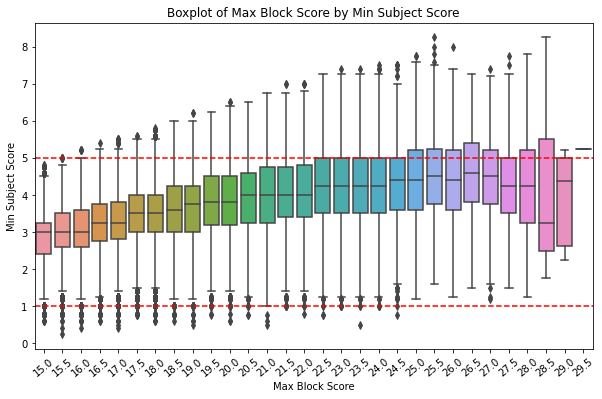

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='max_score', y='min_subject_score', data=df_full_score)
plt.xticks(rotation=40)
plt.axhline(y=5, color='red', linestyle='--')
plt.axhline(y=1, color='red', linestyle='--')
plt.title('Boxplot of Max Block Score by Min Subject Score')
plt.xlabel('Max Block Score')
plt.ylabel('Min Subject Score')
plt.savefig("c6.png",dpi=400) 
plt.show()

### Biểu đồ 8,9. Phổ điểm kỳ vọng

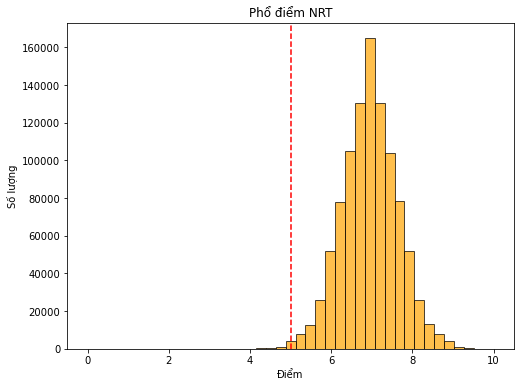

In [18]:
import numpy as np
import matplotlib.pyplot as plt

criteria = [
0,0.25,0.5,0.75,1,1.25,1.5,1.75,2,2.25,2.5,2.75,3,3.25,3.5,3.75,4,4.25,4.5,4.75,5,5.25,5.5,5.75,6,6.25,6.5,6.75,7,7.25,7.5,7.75,8,8.25,8.5,
8.75,9,9.25,9.5,9.75,10]

prob_distribution = [
8.68417396137279E-06,8.68417396137279E-06,
8.68417396137279E-06,8.68417396137279E-06,
8.68417396137279E-06,8.68417396137279E-06,
8.68417396137279E-06,8.68417396137279E-06,
8.68417396137279E-06,8.68417396137279E-06,
8.68417396137279E-06,8.68417396137279E-06,
8.68417396137279E-06,8.68417396137279E-06,
8.68417396137279E-06,0.000043420869806864,
8.68417396137279E-05,0.000173683479227456,
0.00043420869806864,0.000868417396137279,
0.0043420869806864,0.00781575656523551,
0.0130262609420592,0.0260525218841184,
0.0521050437682368,0.0781575656523552,
0.104210087536474,0.130262609420592,
0.164999305266083,0.130262609420592,
0.104210087536474,0.0781575656523552,
0.0521050437682368,0.0260525218841184,
0.0130262609420592,0.00781575656523551,
0.0043420869806864,0.000868417396137279,
0.00043420869806864,8.68417396137279E-06,
8.68417396137279E-06

] 
num_samples = 1000000
crt_scores = np.random.choice(criteria, size=num_samples, p=prob_distribution)

plt.figure(figsize=(8, 6))
plt.hist(crt_scores, bins=41, alpha=0.7,edgecolor='black',color='orange')
plt.title('Phổ điểm NRT')
plt.xlabel('Điểm')
plt.ylabel('Số lượng')

plt.axvline(x=5, linestyle='--',color = 'red')
plt.savefig("result-b101.png",dpi=400) 
plt.show()


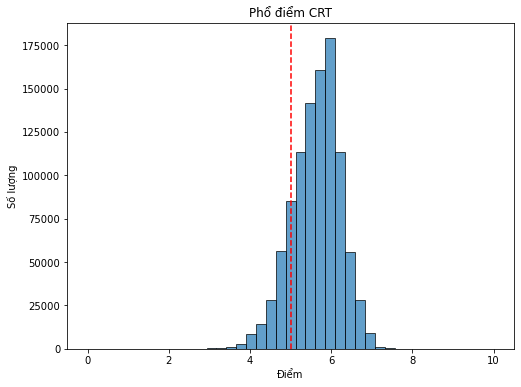

In [19]:
import numpy as np
import matplotlib.pyplot as plt

criteria = [
0,0.25,0.5,0.75,1,1.25,1.5,1.75,2,
2.25,2.5,2.75,3,3.25,3.5,3.75,4,4.25,4.5,4.75,5,5.25,5.5,5.75,6,6.25,6.5,6.75,7,7.25,
7.5,7.75,8,8.25,8.5,8.75,9,9.25,9.5,9.75,10] 
prob_distribution = [
9.43013683128542E-06,9.43013683128542E-06,9.43013683128542E-06,
9.43013683128542E-06,9.43013683128542E-06,9.43013683128542E-06,
9.43013683128542E-06,9.43013683128542E-06,9.43013683128542E-06,
9.43013683128542E-06,4.71506841564271E-05,9.43013683128542E-05,
0.000188602736625708,0.000471506841564271,0.000943013683128542,
0.00282904104938563,0.00848712314815688,0.0141452052469281,
0.0282904104938563,0.0565808209877125,0.0848712314815688,
0.113161641975425,0.141452052469281,0.160312326131852,
0.179172599794423,0.113161641975425,0.0565808209877125,
0.0282904104938563,0.00943013683128542,0.000943013683128542,
0.000235753420782136,9.43013683128542E-05,4.71506841564271E-05,
9.43013683128542E-06,9.43013683128542E-06,9.43013683128542E-06,
9.43013683128542E-06,9.43013683128542E-06,
9.43013683128542E-06,9.43013683128542E-06,9.43013683128542E-06
]  

num_samples = 1000000
crt_scores = np.random.choice(criteria, size=num_samples, p=prob_distribution)
plt.figure(figsize=(8, 6))
plt.hist(crt_scores, bins=41, alpha=0.7,edgecolor='black')
plt.title('Phổ điểm CRT')
plt.xlabel('Điểm')
plt.ylabel('Số lượng')

plt.axvline(x=5, linestyle='--',color = 'red')
plt.savefig("result-b102.png",dpi=400) 
plt.show()


### Phổ điểm môn thi & khối thi

In [20]:
df_tmp_1 = pd.read_csv('vnhsge-2018_score_1.csv')
df_tmp_2 = pd.read_csv('vnhsge-2018_score_2.csv')
df_score = pd.merge(df_tmp_1, df_tmp_2, how='outer')
df_score = df_score.drop_duplicates()
df_score = df_score.sort_values(by=['is_chosen','subject_id'],ascending=False)
df_score = df_score[df_score['score'] > 0]
df_score

,candidate_id,subject_id,score,is_chosen
5,1000019,Van,5.75,1
11,1000020,Van,8.25,1
17,1000021,Van,8.00,1
23,1000022,Van,6.50,1
29,1000023,Van,6.75,1
...,...,...,...,...
5391039,64006209,Anh,2.80,0
5391045,64006210,Anh,3.00,0
5391057,64006212,Anh,5.00,0
5391069,64006214,Anh,3.80,0


In [22]:
df_block_score = pd.read_csv('vnhsge-2018_block_score.csv')
df_block_score

,candidate_id,block_id,score
0,1000019,C00,16.75
1,1000020,D01,22.05
2,1000021,D01,20.00
3,1000022,D01,21.90
4,1000023,D01,19.35
...,...,...,...
921980,64006213,D01,20.55
921981,64006214,A00,18.45
921982,64006214,B00,18.45
921983,64006215,A00,19.80


<Figure size 720x576 with 0 Axes>

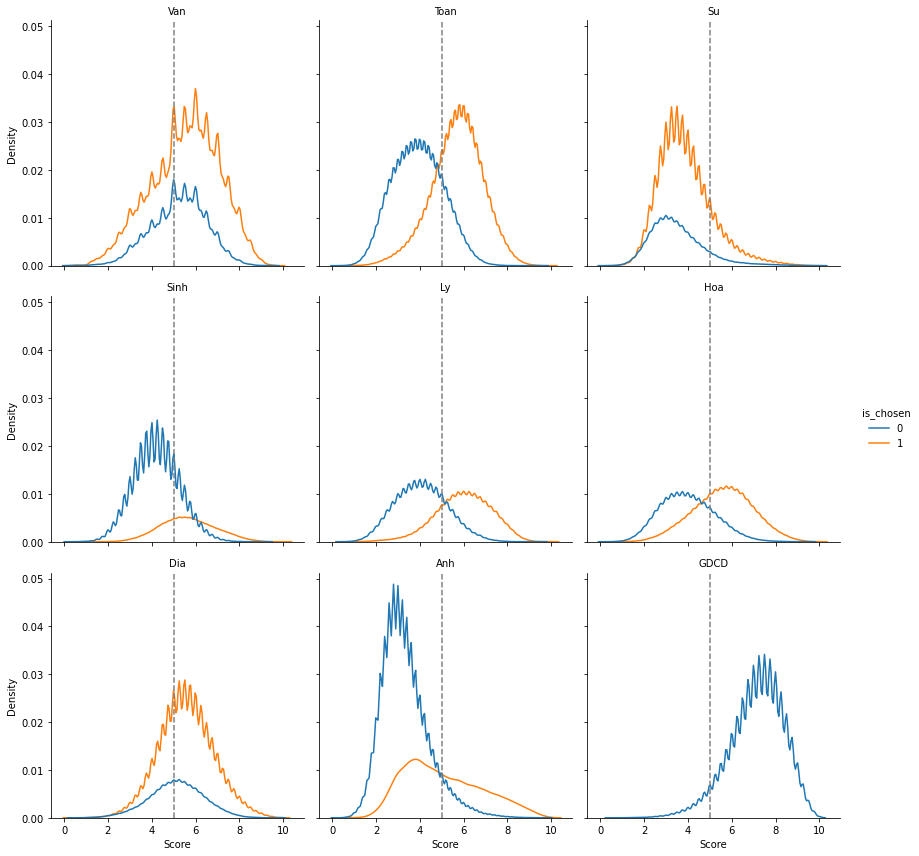

In [21]:
plt.figure(figsize=(10, 8))
g = sns.displot(
    data=df_score, x="score", col="subject_id", hue = "is_chosen",
    kind="kde", height=4, aspect=1,col_wrap=3)
g.refline(x=5)
g.set_axis_labels("Score", "Density")
g.set_titles("{col_name}")
plt.savefig("result-x101.png",dpi=400) 
plt.show()

<Figure size 720x576 with 0 Axes>

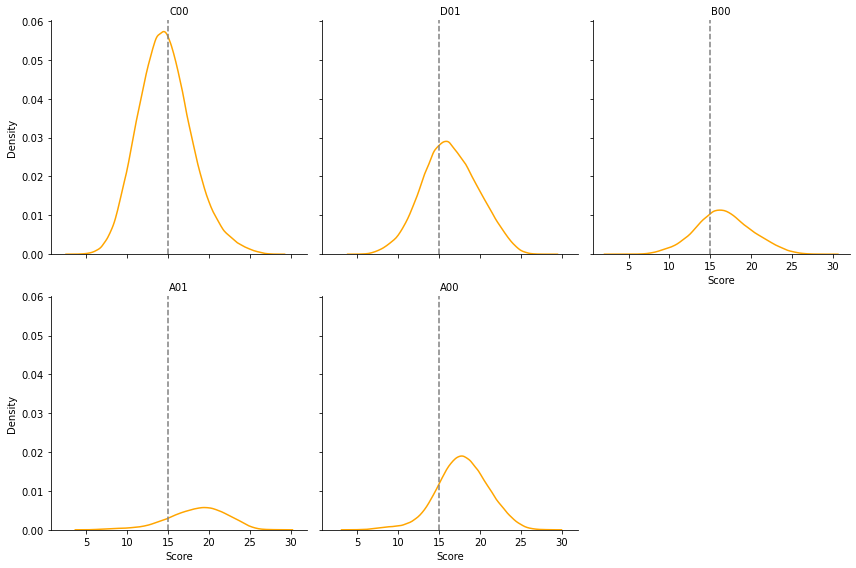

In [24]:
plt.figure(figsize=(10, 8))
g = sns.displot(
    data=df_block_score, x="score", col="block_id",color = 'orange',
    kind="kde", height=4, aspect=1,col_wrap=3)
g.refline(x=15)
g.set_axis_labels("Score", "Density")
g.set_titles("{col_name}")
plt.savefig("result-x102.png",dpi=400) 
plt.show()

In [10]:
for i in df_score['subject_id'].unique():
    if i != 'GDCD':
        df = df_score[(df_score['subject_id'] == i) & (df_score['is_chosen'] == 1)]
        num_rows = len(df)
        mean = round(np.mean(df['score']),2)
        std_dev = round(np.std(df['score']),2)
        percent_below_5 = round(len(df[df['score'] < 5]) / len(df) * 100,2)
        print(i,num_rows,mean,std_dev,percent_below_5)

Van 651145 5.53 1.55 31.24
Toan 483116 5.7 1.18 23.15
Su 423166 3.89 1.23 81.58
Sinh 87394 5.64 1.24 27.94
Ly 179753 6.0 1.26 18.1
Hoa 213524 5.61 1.37 29.3
Dia 423166 5.57 1.25 28.79
Anh 272236 5.06 1.77 52.4


In [9]:
for i in df_score['subject_id'].unique():
    df = df_score[(df_score['subject_id'] == i) & (df_score['is_chosen'] == 0)]
    num_rows = len(df)
    mean = round(np.mean(df['score']),2)
    std_dev = round(np.std(df['score']),2)
    percent_below_5 = round(len(df[df['score'] < 5]) / len(df) * 100,2)
    print(i,num_rows,mean,std_dev,percent_below_5)

Van 250481 5.25 1.24 35.09
Toan 433399 3.92 1.15 79.15
Su 142076 3.5 1.22 88.15
Sinh 295904 4.22 1.04 73.76
Ly 206978 4.08 1.18 74.57
Hoa 175752 4.0 1.23 76.24
Dia 125642 5.13 1.22 41.03
Anh 543966 3.34 1.08 91.39
GDCD 479104 7.13 1.24 4.88


In [8]:
for i in df_block_score['block_id'].unique():
    df = df_block_score[df_block_score['block_id'] == i]
    num_rows = len(df)
    mean = round(np.mean(df['score']),2)
    std_dev = round(np.std(df['score']),2)
    print(i,num_rows,mean,std_dev)

C00 423166 14.67 3.31
D01 230924 16.34 3.4
B00 87394 16.65 3.42
A01 46574 18.5 3.6
A00 133927 17.82 3.19
